# Import

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

# Call File

In [25]:
user_behavior = pd.read_csv('user_behavior_updated.csv', low_memory=False)
wordcount_first_last_dates = pd.read_csv('wordcount_first_last_dates.csv', low_memory=False)
hero_game_mission_history = pd.read_csv('files/hero_game_mission_history.csv', low_memory=False)

In [26]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48983 entries, 0 to 48982
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   iduser            48983 non-null  int64
 1   idhero            48983 non-null  int64
 2   tour              48983 non-null  int64
 3   paid_user         48983 non-null  int64
 4   customize         48983 non-null  int64
 5   num_news_read     48983 non-null  int64
 6   highest_streak    48983 non-null  int64
 7   sum_wordcount     48983 non-null  int64
 8   friends_amount    48983 non-null  int64
 9   count_common      48983 non-null  int64
 10  count_required    48983 non-null  int64
 11  count_completed   48983 non-null  int64
 12  count_lost        48983 non-null  int64
 13  highest_area      48983 non-null  int64
 14  inventory_count   48983 non-null  int64
 15  wardrobe_updated  48983 non-null  int64
dtypes: int64(16)
memory usage: 6.0 MB


# Define Function

In [27]:

    
# Group the DataFrame by 'paid_user' and calculate the sum of the specified feature for each group
def compare_sum(df, column_name, file_name):
    # Calculate the sum of the specified column for each value of "paid_user"
    sums = df.groupby('paid_user')[column_name].sum()

    # Create a bar graph
    plt.bar(sums.index, sums.values, width=0.6, color='#903794')
    plt.xlabel('User')
    plt.ylabel('Total ' + column_name)
    plt.title('Total ' + column_name + ' by User')
    plt.xticks(sums.index, ['Non Paid', 'Paid'])  # Optional: Set custom labels for x-axis
    
    # Save the chart to a specific file
    file_path = f"/Users/chingyuhsieh/test/Dissertation/graphs/{file_name}.png"
    plt.savefig(file_path)
    
    plt.show()
    

In [28]:
behavior_stats = user_behavior.describe().round(2)

behavior_stats.to_csv('behavior_stats.csv', index=True)

behavior_stats

,iduser,idhero,tour,paid_user,customize,num_news_read,highest_streak,sum_wordcount,friends_amount,count_common,count_required,count_completed,count_lost,highest_area,inventory_count,wardrobe_updated
count,48983.00,48983.00,48983.00,48983.00,48983.0,48983.00,48983.00,4.898300e+04,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00,48983.00
mean,25295.97,26571.59,0.21,0.17,0.1,21.39,36.68,9.419541e+04,0.48,19.74,3.17,40.40,2.59,3.95,33.07,0.18
std,14569.15,14560.22,0.41,0.38,0.3,55.34,185.38,8.522412e+05,3.52,95.56,10.50,228.67,14.58,10.55,54.40,0.39
min,1.00,1.00,0.00,0.00,0.0,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12701.50,13968.50,0.00,0.00,0.0,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,1.00,9.00,0.00
50%,25240.00,26507.00,0.00,0.00,0.0,0.00,1.00,6.310000e+02,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.00
75%,37938.50,39209.50,0.00,0.00,0.0,24.00,2.00,9.052500e+03,0.00,1.00,1.00,2.00,0.00,1.00,26.00,0.00
max,50535.00,51806.00,1.00,1.00,1.0,479.00,2717.00,1.369121e+08,251.00,1420.00,125.00,5842.00,419.00,66.00,468.00,1.00


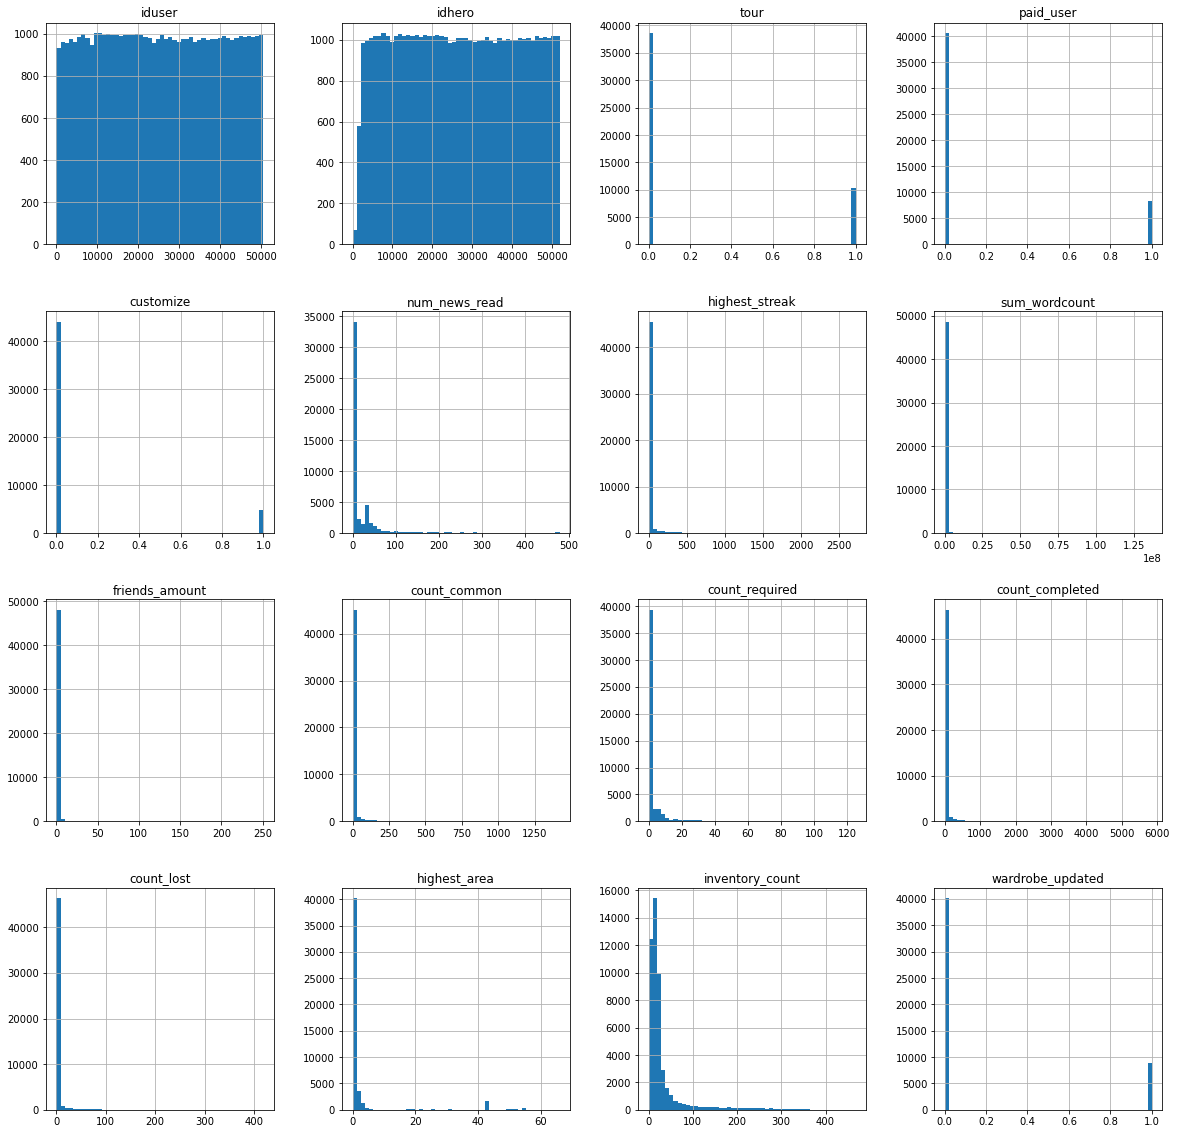

In [29]:
user_behavior.hist(bins= 50, figsize=(20,20))
plt.show()

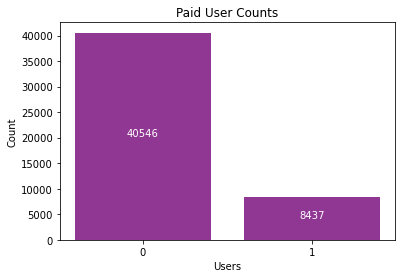

In [30]:
# Filter the paid_user_table DataFrame to include only values 1 and 0
filtered_paid_user_table = paid_user_table[paid_user_table['paid_user'].isin([0, 1])]

# Plotting the data
plt.bar(filtered_paid_user_table['paid_user'], filtered_paid_user_table['count'], color='#903794')
plt.xlabel('Users')
plt.ylabel('Count')
plt.title('Paid User Counts')
plt.xticks([0, 1])  # Set the x-axis tick values to 0 and 1

# Annotate the bars with count values in the middle
for i, count in enumerate(filtered_paid_user_table['count']):
    plt.text(filtered_paid_user_table['paid_user'][i], count/2, str(count), ha='center', color='white')

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Paid User Counts.png')

plt.show()


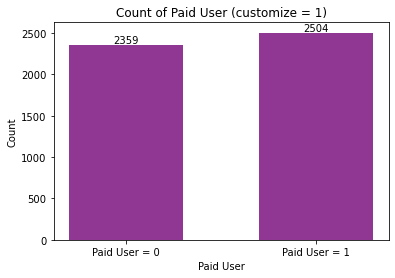

In [31]:
# Filter data based on conditions
filtered_data = user_behavior[user_behavior['customize'] == 1]

# Count occurrences of paid_user = 1 and paid_user = 0
counts = filtered_data['paid_user'].value_counts().sort_index()

# Plotting the bar chart
plt.bar(counts.index, counts.values, width=0.6, color='#903794')

# Adding labels and title
plt.xlabel('Paid User')
plt.ylabel('Count')
plt.title('Count of Paid User (customize = 1)')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['Paid User = 0', 'Paid User = 1'])

# Adding count labels on top of each bar
for i, count in enumerate(counts.values):
    plt.text(i, count + 20, str(count), ha='center')
    
#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Customized for User.png')

# Display the plot
plt.show()

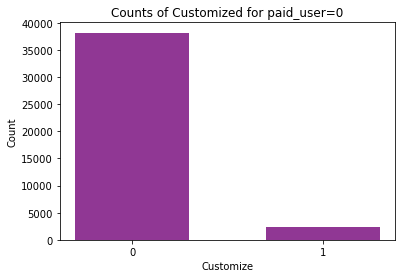

In [32]:
filtered_data = user_behavior[user_behavior['paid_user'] == 0]

# Step 3: Count the occurrences
counts = filtered_data['customize'].value_counts()

# Step 4: Create the bar chart
plt.bar(counts.index.astype(str), counts.values, width=0.6, color='#903794' )

# Add labels and title
plt.xlabel('Customize')
plt.ylabel('Count')
plt.title('Counts of Customized for paid_user=0')

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Customized for Non Paid User.png')

# Show the plot
plt.show()

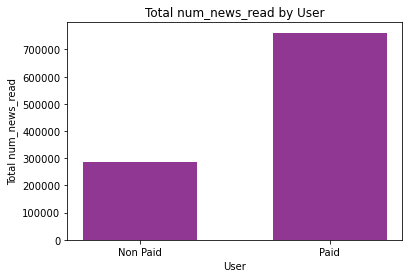

In [33]:
compare_sum(user_behavior, 'num_news_read', 'News Read in User')

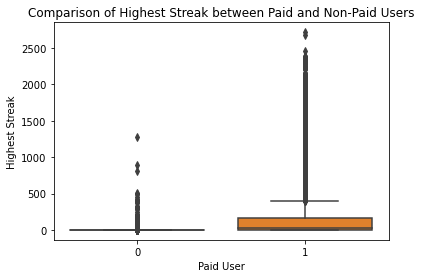

In [34]:
# Box plot
sns.boxplot(x=user_behavior['paid_user'], y=user_behavior['highest_streak'])
plt.xlabel('Paid User')
plt.ylabel('Highest Streak')
plt.title('Comparison of Highest Streak between Paid and Non-Paid Users')

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/highest_streak_user.png')

plt.show()


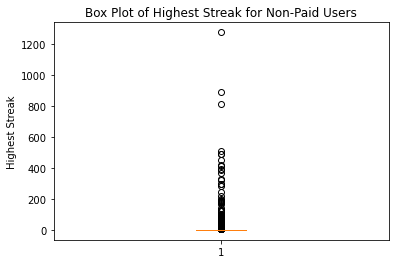

In [35]:
# Filter data for non-paid users (paid_user = 0)
non_paid_users = user_behavior[user_behavior['paid_user'] == 0]

# Box plot for highest streak
plt.boxplot(non_paid_users['highest_streak'])
plt.ylabel('Highest Streak')
plt.title('Box Plot of Highest Streak for Non-Paid Users')

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/streak_non_paid.png')

plt.show()


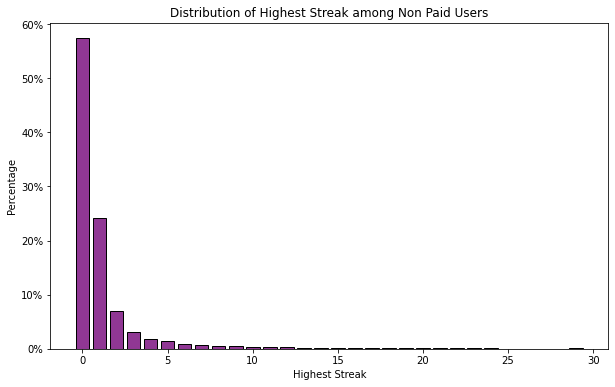

In [36]:
# Filter the DataFrame to select only rows where paid_user = 0 and highest_streak < 30
non_paid_streak = user_behavior[(user_behavior['paid_user'] == 0) & (user_behavior['highest_streak'] < 30)]

# Get the counts for each 'highest_streak' value
counts = non_paid_streak['highest_streak'].value_counts()

# Sort the 'highest_streak' values in ascending order
counts = counts.sort_index()

# Calculate the percentage of each count
total_counts = counts.sum()
percentages = (counts / total_counts) * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting a bar chart to visualize the distribution of highest_streak
plt.bar(counts.index, percentages, color='#903794', edgecolor='black')

# Set the title and labels for the plot
plt.title('Distribution of Highest Streak among Non Paid Users')
plt.xlabel('Highest Streak')
plt.ylabel('Percentage')

# Add '%' symbol beside each number on the y-axis
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/streak_non_paid_<30.png')

# Display the plot
plt.show()

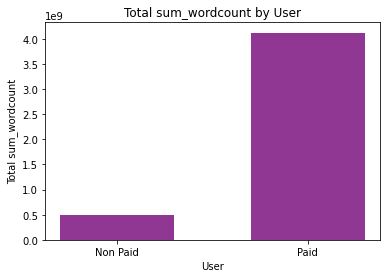

<Figure size 432x288 with 0 Axes>

In [60]:
compare_sum(user_behavior, 'sum_wordcount', 'Wordcount in User')


In [38]:
# Filter the DataFrame based on paid_user = 0
filtered_data_0 = user_behavior[user_behavior['paid_user'] == 0]
# Apply the describe() function to the 'sum_wordcount' column of the filtered data for paid_user = 0
description_0 = filtered_data_0['sum_wordcount'].describe()
# Print the descriptive statistics for paid_user = 0
print("Descriptive statistics for paid_user = 0:")
print(description_0.round(2))

# Filter the DataFrame based on paid_user = 1
filtered_data_1 = user_behavior[user_behavior['paid_user'] == 1]
# Apply the describe() function to the 'sum_wordcount' column of the filtered data for paid_user = 1
description_1 = filtered_data_1['sum_wordcount'].describe()
# Print the descriptive statistics for paid_user = 1
print("Descriptive statistics for paid_user = 1:")
print(description_1.round(2))

Descriptive statistics for paid_user = 0:
count       40546.00
mean        12160.44
std        206008.31
min             0.00
25%             0.00
50%           251.00
75%          2348.00
max      20553146.00
Name: sum_wordcount, dtype: float64
Descriptive statistics for paid_user = 1:
count    8.437000e+03
mean     4.884338e+05
std      1.955875e+06
min      0.000000e+00
25%      2.664800e+04
50%      1.031290e+05
75%      3.951080e+05
max      1.369121e+08
Name: sum_wordcount, dtype: float64


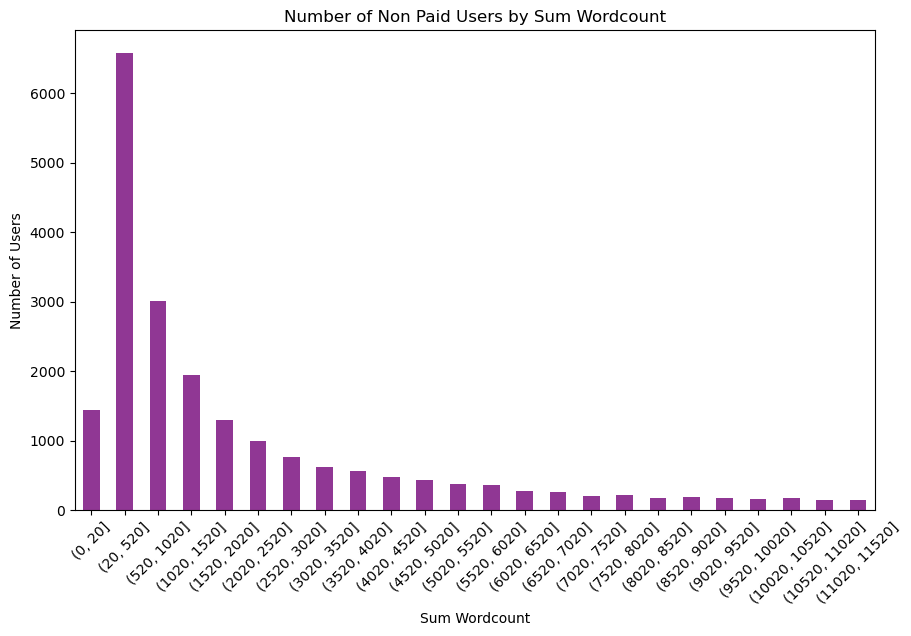

In [39]:
# Filter the DataFrame to include only rows where 'paid_user' is 0
filtered_data = user_behavior[user_behavior['paid_user'] == 0]

# Define the bins for sum_wordcount
bins = [0] + list(range(20, 12000, 500))  # Added 0 as the first bin
# Group the data by sum_wordcount and count the number of users in each bin
count_by_wordcount = filtered_data.groupby(pd.cut(filtered_data['sum_wordcount'], bins)).size()

# Plot the bar graph
plt.figure(figsize=(10, 6), dpi=100)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
count_by_wordcount.plot(kind='bar', color='#903794')
plt.xlabel('Sum Wordcount')
plt.ylabel('Number of Users')
plt.title('Number of Non Paid Users by Sum Wordcount')
plt.xticks(rotation=45)

# Save the graph with proper edges
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/wordcount_non_paid.png', bbox_inches='tight')

plt.show()

In [40]:
#combine most recent date
wordcount_date = pd.merge(user_behavior[['iduser', 'paid_user', 'sum_wordcount']], 
                     wordcount_first_last_dates, 
                     on='iduser', 
                     how='left')

# Print the joined DataFrame
wordcount_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48983 entries, 0 to 48982
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   iduser         48983 non-null  int64 
 1   paid_user      48983 non-null  int64 
 2   sum_wordcount  48983 non-null  int64 
 3   first_date     36758 non-null  object
 4   last_date      36758 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [41]:
#drop date NaN rows 

# Drop rows where 'date' column is NaN
wordcount_date_dropped = wordcount_date.dropna(subset=['first_date'])

# Print the filtered DataFrame
wordcount_date_dropped

,iduser,paid_user,sum_wordcount,first_date,last_date
1,28032,1,30070,2020-03-23,2020-06-16
2,14,0,2355,2017-03-16,2017-04-02
4,24369,1,242181,2019-10-21,2021-06-04
5,24368,0,2003,2019-10-21,2019-11-05
6,28022,0,4344,2020-03-21,2020-03-21
...,...,...,...,...,...
48978,50531,0,21,2023-05-02,2023-05-02
48979,50532,0,10949,2023-05-02,2023-05-02
48980,50533,0,27,2023-05-02,2023-05-02
48981,50534,0,221,2023-05-02,2023-05-02


/var/folders/q7/ylll3z6s53358qghdrrdyqbh0000gn/T/ipykernel_48964/305886651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordcount_date_dropped.loc[:, 'first_date'] = pd.to_datetime(wordcount_date_dropped['first_date'])
/var/folders/q7/ylll3z6s53358qghdrrdyqbh0000gn/T/ipykernel_48964/305886651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordcount_date_dropped.loc[:, 'last_date'] = pd.to_datetime(wordcount_date_dropped['last_date'])


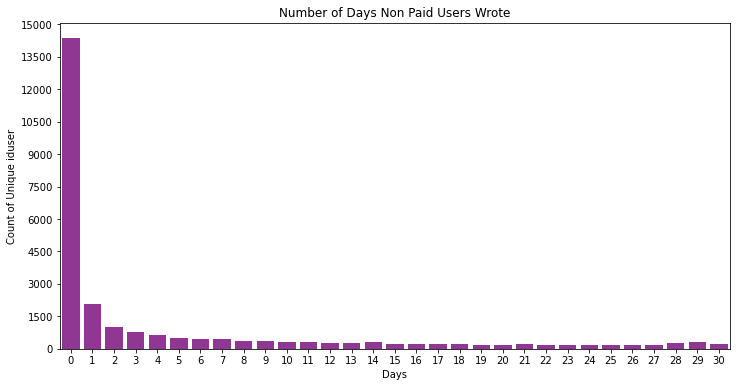

In [42]:
# Convert 'first_date' and 'last_date' columns to datetime type
wordcount_date_dropped.loc[:, 'first_date'] = pd.to_datetime(wordcount_date_dropped['first_date'])
wordcount_date_dropped.loc[:, 'last_date'] = pd.to_datetime(wordcount_date_dropped['last_date'])

# Filter the DataFrame based on paid_user = 0
filtered_df = wordcount_date_dropped[wordcount_date_dropped['paid_user'] == 0].copy()

# Calculate the number of days for each user
filtered_df.loc[:, 'days'] = (filtered_df['last_date'] - filtered_df['first_date']).dt.days

# Count the unique iduser values for each day, including zero days
count_by_days = filtered_df['days'].value_counts().sort_index()

# Filter the data to include only count <= 30 #does not assum non paid user that exceed more than 30 days
count_by_days_filtered = count_by_days[count_by_days <= 30]

# Create the bar chart with modified width and color
plt.figure(figsize=(12, 6))  # Adjust the width by changing the figsize parameter
bars = plt.bar(count_by_days.index, count_by_days.values, color='#903794')  # Change the color to yellow

# Set the labels and title
plt.xlabel('Days')
plt.ylabel('Count of Unique iduser')
plt.title('Number of Days Non Paid Users Wrote')

# Set the x-axis ticks and limits
plt.xticks(range(0, 32))  # Include zero day
plt.xlim(-0.5, 30.5)  # Adjust the x-axis limits to include zero day
# Set the y-axis limits
plt.yticks(range(0, 15001, 1500))  # Specify the desired upper limit, adjust as needed

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Number of Days Non Paid Users Wrote.png')

# Display the chart
plt.show()

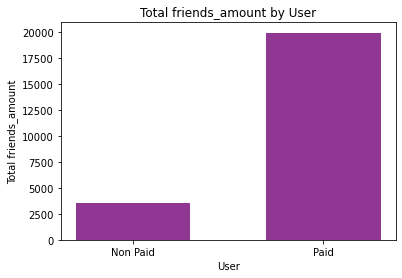

In [43]:
compare_sum(user_behavior, 'friends_amount', 'Friends Count of User')

In [44]:
total_paid = user_behavior[user_behavior['paid_user'] == 1].shape[0]
total_non_paid = user_behavior[user_behavior['paid_user'] == 0].shape[0]

zero_friends_paid = user_behavior[(user_behavior['paid_user'] == 1) & (user_behavior['friends_amount'] == 0)].shape[0]
zero_friends_non_paid = user_behavior[(user_behavior['paid_user'] == 0) & (user_behavior['friends_amount'] == 0)].shape[0]

percentage_zero_friends_paid = round((zero_friends_paid / total_paid) * 100, 2)
percentage_zero_friends_non_paid = round((zero_friends_non_paid / total_non_paid) * 100, 2)

print("Percentage of paid users (paid_user = 1) with zero friends:", percentage_zero_friends_paid)
print("Percentage of non-paid users (paid_user = 0) with zero friends:", percentage_zero_friends_non_paid)

Percentage of paid users (paid_user = 1) with zero friends: 58.94
Percentage of non-paid users (paid_user = 0) with zero friends: 95.69


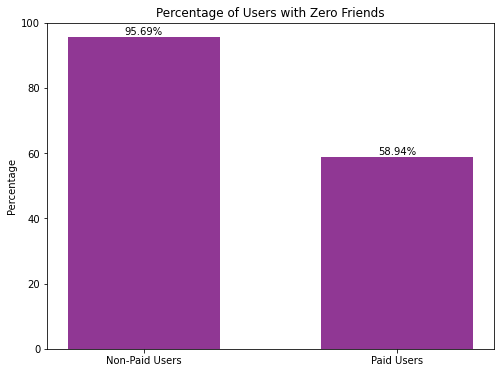

In [45]:
total_paid = user_behavior[user_behavior['paid_user'] == 1].shape[0]
total_non_paid = user_behavior[user_behavior['paid_user'] == 0].shape[0]

zero_friends_paid = user_behavior[(user_behavior['paid_user'] == 1) & (user_behavior['friends_amount'] == 0)].shape[0]
zero_friends_non_paid = user_behavior[(user_behavior['paid_user'] == 0) & (user_behavior['friends_amount'] == 0)].shape[0]

percentage_zero_friends_paid = round((zero_friends_paid / total_paid) * 100, 2)
percentage_zero_friends_non_paid = round((zero_friends_non_paid / total_non_paid) * 100, 2)

# Adjusting the figure size
plt.figure(figsize=(8, 6))


# Data for the bar plot
categories = ['Non-Paid Users','Paid Users']
percentages = [ percentage_zero_friends_non_paid, percentage_zero_friends_paid]

# Plotting the bar plot
plt.bar(categories, percentages, width=0.6, color='#903794')
plt.ylabel('Percentage')
plt.title('Percentage of Users with Zero Friends')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for better visualization

# Displaying the percentage values on top of each bar
for i in range(len(categories)):
    plt.text(i, percentages[i], f"{percentages[i]}%", ha='center', va='bottom')


#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Percentage of Users with Zero Friends.png')

plt.show()






In [46]:
# Filter the DataFrame based on the condition
filtered_data = user_behavior[user_behavior['paid_user'] == 0]

# Apply the describe() function to the 'inventory_count' column of the filtered data
description_friends = filtered_data['friends_amount'].describe()

description_friends.round(2)

count    40546.00
mean         0.09
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         50.00
Name: friends_amount, dtype: float64

In [47]:
# Filter the DataFrame based on paid_user = 0
filtered_data_0 = user_behavior[user_behavior['paid_user'] == 0]
# Apply the describe() function to the 'inventory_count' column of the filtered data for paid_user = 0
description_0 = filtered_data_0['friends_amount'].describe()
# Print the descriptive statistics for paid_user = 0
print("Descriptive statistics for paid_user = 0:")
print(description_0.round(2))

# Filter the DataFrame based on paid_user = 1
filtered_data_1 = user_behavior[user_behavior['paid_user'] == 1]
# Apply the describe() function to the 'inventory_count' column of the filtered data for paid_user = 1
description_1 = filtered_data_1['friends_amount'].describe()
# Print the descriptive statistics for paid_user = 1
print("Descriptive statistics for paid_user = 1:")
print(description_1.round(2))

Descriptive statistics for paid_user = 0:
count    40546.00
mean         0.09
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         50.00
Name: friends_amount, dtype: float64
Descriptive statistics for paid_user = 1:
count    8437.00
mean        2.36
std         8.04
min         0.00
25%         0.00
50%         0.00
75%         2.00
max       251.00
Name: friends_amount, dtype: float64


In [48]:
#combine mission with paid_user 
mission_history = pd.merge(user_behavior[['idhero', 'paid_user']],
                           hero_game_mission_history[['idhero','category', 'status']],
                           on='idhero',
                           how='left')

mission_history

,idhero,paid_user,category,status
0,1,1,NaN,NaN
1,29299,1,common,completed
2,29299,1,required,completed
3,29299,1,required,completed
4,29299,1,required,completed
...,...,...,...,...
2137444,51803,0,NaN,NaN
2137445,51804,0,common,completed
2137446,51805,0,common,completed
2137447,51805,0,common,completed


In [49]:
#drop out NaN. 
mission_history.dropna(subset=['category', 'status'], inplace=True)
mission_history

,idhero,paid_user,category,status
1,29299,1,common,completed
2,29299,1,required,completed
3,29299,1,required,completed
4,29299,1,required,completed
5,29299,1,common,completed
...,...,...,...,...
2137441,51800,0,common,completed
2137445,51804,0,common,completed
2137446,51805,0,common,completed
2137447,51805,0,common,completed


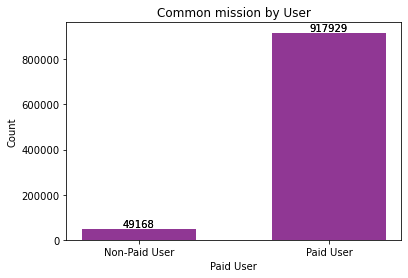

In [50]:
common_counts = mission_history[mission_history['category'] == 'common']['paid_user'].value_counts()

# Plotting the bar plot with reversed order
plt.bar(common_counts.index[::-1], common_counts.values[::-1], width=0.6, color='#903794')
plt.xlabel('Paid User')
plt.ylabel('Count')
plt.title('Common mission by User')
plt.xticks(common_counts.index[::-1], ['Non-Paid User', 'Paid User'])

# Displaying the count values on top of each bar
for i, count in enumerate(common_counts.values[::-1]):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
# Displaying the count values on top of each bar
for i, count in enumerate(common_counts.values[::-1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Common mission by User.png')

plt.show()

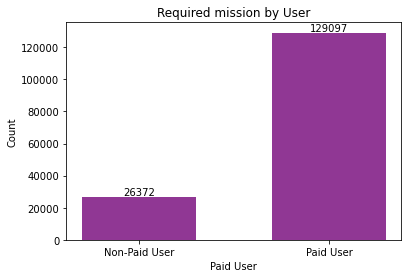

In [51]:
common_counts = mission_history[mission_history['category'] == 'required']['paid_user'].value_counts()

# Plotting the bar plot with reversed order
plt.bar(common_counts.index[::-1], common_counts.values[::-1], width=0.6, color='#903794')
plt.xlabel('Paid User')
plt.ylabel('Count')
plt.title('Required mission by User')
plt.xticks(common_counts.index[::-1], ['Non-Paid User', 'Paid User'])

# Displaying the count values on top of each bar
for i, count in enumerate(common_counts.values[::-1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Required mission by User.png')

plt.show()

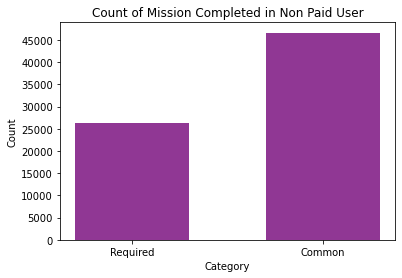

In [52]:
required_completed_count = mission_history[(mission_history['category'] == 'required') &
                                           (mission_history['status'] == 'completed') &
                                           (mission_history['paid_user'] == 0)].shape[0]

common_completed_count = mission_history[(mission_history['category'] == 'common') &
                                         (mission_history['status'] == 'completed') &
                                         (mission_history['paid_user'] == 0)].shape[0]

# Data for the bar plot
categories = ['Required', 'Common']
counts = [required_completed_count, common_completed_count]

# Plotting the bar plot
plt.bar(categories, counts, width=0.6, color='#903794')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Count of Mission Completed in Non Paid User")
plt.yticks(range(0, 50000, 5000))


#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Count of Mission Completed in Non Paid User.png')

plt.show()

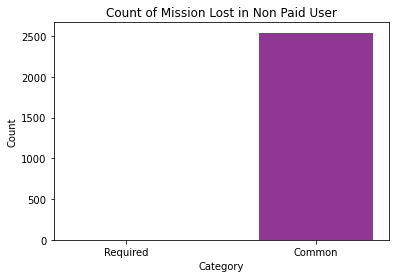

In [53]:
required_lost_count = mission_history[(mission_history['category'] == 'required') &
                                      (mission_history['status'] == 'lost') &
                                      (mission_history['paid_user'] == 0)].shape[0]

common_lost_count = mission_history[(mission_history['category'] == 'common') &
                                    (mission_history['status'] == 'lost') &
                                    (mission_history['paid_user'] == 0)].shape[0]

# Data for the bar plot
categories = ['Required', 'Common']
counts = [required_lost_count, common_lost_count]

# Plotting the bar plot
plt.bar(categories, counts, width=0.6, color='#903794')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title("Count of Mission Lost in Non Paid User")

#save file
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Count of Mission Completed in Paid User.png')

plt.show()

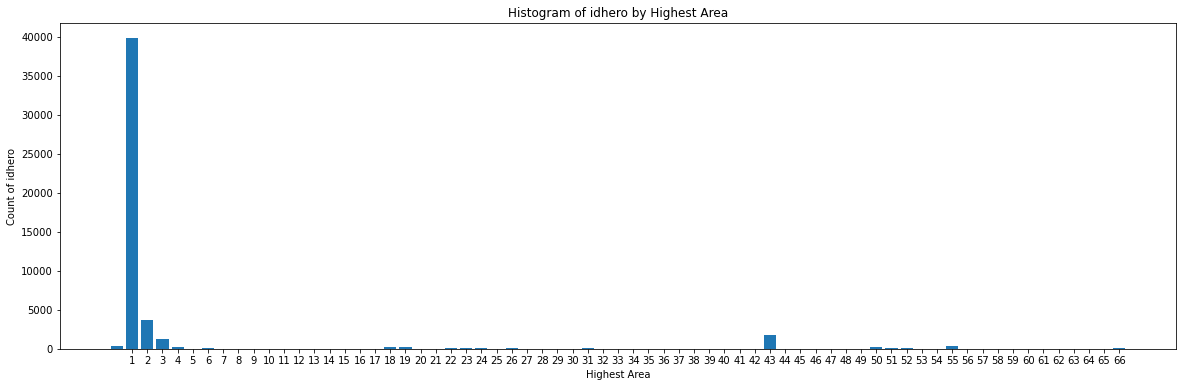

In [54]:
#Grouping the data by 'highest_area' and counting the occurrences of 'idhero' for each group
grouped_data = user_behavior.groupby('highest_area')['idhero'].count()

# Adjusting figure size
plt.figure(figsize=(20, 6))

# Creating a histogram using matplotlib
plt.bar(grouped_data.index, grouped_data.values)

# Setting labels and title for the histogram
plt.xlabel('Highest Area')
plt.ylabel('Count of idhero')
plt.title('Histogram of idhero by Highest Area')

# Setting x-axis tick labels
plt.xticks(range(1, 67))

# Displaying the histogram
plt.show()

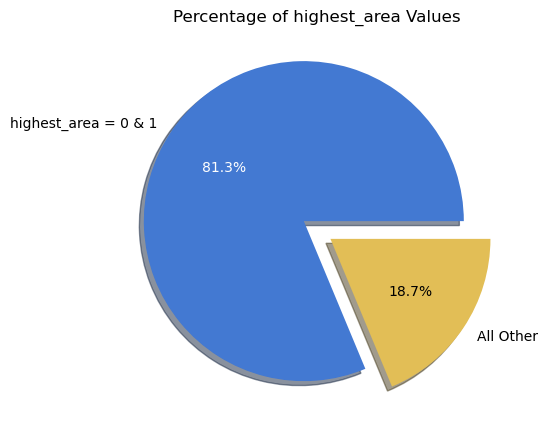

In [64]:
import matplotlib.pyplot as plt

# Counting the occurrences of each 'highest_area' value
grouped_data = user_behavior['highest_area'].value_counts()

# Extracting the count for 'highest_area' 1
count_1 = grouped_data.get(1, 0)

# Computing the count for all other 'highest_area' values
count_other = grouped_data.sum() - count_1

# Creating data for the pie chart
sizes = [count_1, count_other]
labels = ['highest_area = 0 & 1', 'All Other']
explode = (0.1, 0.1)  # Explode slices for emphasis
colors = ['#4379D2', '#E2BE56']

# Adjusting figure size and padding
plt.figure(figsize=(5, 5), dpi=100)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Creating the pie chart
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    colors=colors
)

# Adjusting the color of the number text for 'highest_area' 1 slice
autotexts[0].set_color('white')

# Setting title for the pie chart
plt.title('Percentage of highest_area Values')

# Saving the chart with proper edges
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Percentage of areas hero been.png', bbox_inches='tight')

# Displaying the pie chart
plt.show()


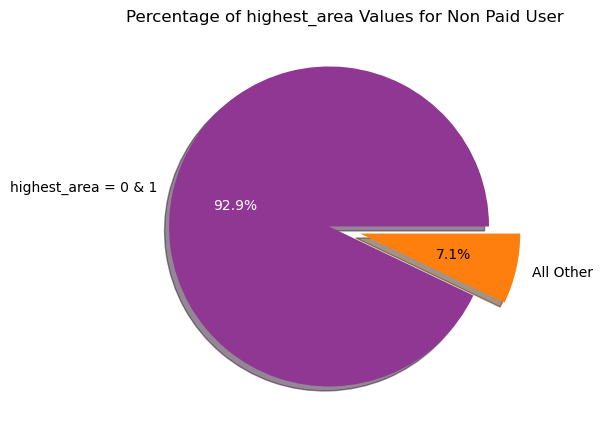

In [56]:
import matplotlib.pyplot as plt

# Counting the occurrences of each 'highest_area' value for paid_user = 0
grouped_data = user_behavior[user_behavior['paid_user'] == 0]['highest_area'].value_counts()

# Extracting the count for 'highest_area' 1
count_1 = grouped_data.get(1, 0)

# Computing the count for all other 'highest_area' values
count_other = grouped_data.sum() - count_1

# Creating data for the pie chart
sizes = [count_1, count_other]
labels = ['highest_area = 0 & 1', 'All Other']
explode = (0.1, 0.1)  # Explode slices for emphasis
colors = ['#903794', '#FF7F0E']  # Custom colors for the slices

# Adjusting figure size and padding
plt.figure(figsize=(5, 5), dpi=100)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Creating the pie chart
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    colors=colors
)

# Adjusting the color of the number text for 'highest_area' 1 slice
autotexts[0].set_color('white')

# Setting title for the pie chart
plt.title('Percentage of highest_area Values for Non Paid User')

# Saving the chart with proper edges
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Percentage of areas non paid_user been.png', bbox_inches='tight')

# Displaying the pie chart
plt.show()


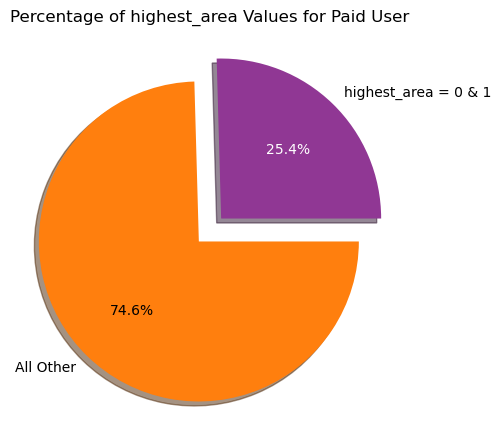

In [57]:
import matplotlib.pyplot as plt

# Counting the occurrences of each 'highest_area' value for paid_user = 1
grouped_data = user_behavior[user_behavior['paid_user'] == 1]['highest_area'].value_counts()

# Extracting the count for 'highest_area' 1
count_1 = grouped_data.get(1, 0)

# Computing the count for all other 'highest_area' values
count_other = grouped_data.sum() - count_1

# Creating data for the pie chart
sizes = [count_1, count_other]
labels = ['highest_area = 0 & 1', 'All Other']
explode = (0.1, 0.1)  # Explode slices for emphasis
colors = ['#903794', '#FF7F0E']  # Custom colors for the slices

# Adjusting figure size and padding
plt.figure(figsize=(5, 5), dpi=100)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Creating the pie chart
patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    colors=colors
)

# Adjusting the color of the number text for 'highest_area' 1 slice
autotexts[0].set_color('white')

# Setting title for the pie chart
plt.title('Percentage of highest_area Values for Paid User')

# Saving the chart with proper edges
plt.savefig('/Users/chingyuhsieh/test/Dissertation/graphs/Percentage of areas paid_user been.png', bbox_inches='tight')

# Displaying the pie chart
plt.show()


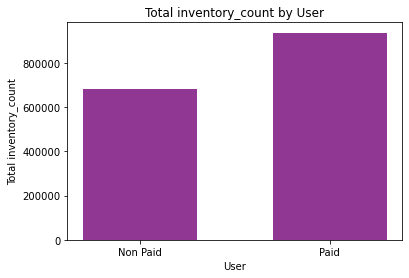

In [58]:
compare_sum(user_behavior, 'inventory_count', 'Inventory Amount in User')

In [59]:
# Filter the DataFrame based on paid_user = 0
filtered_data_0 = user_behavior[user_behavior['paid_user'] == 0]
# Apply the describe() function to the 'inventory_count' column of the filtered data for paid_user = 0
description_0 = filtered_data_0['inventory_count'].describe()
# Print the descriptive statistics for paid_user = 0
print("Descriptive statistics for paid_user = 0:")
print(description_0.round(2))

# Filter the DataFrame based on paid_user = 1
filtered_data_1 = user_behavior[user_behavior['paid_user'] == 1]
# Apply the describe() function to the 'inventory_count' column of the filtered data for paid_user = 1
description_1 = filtered_data_1['inventory_count'].describe()
# Print the descriptive statistics for paid_user = 1
print("Descriptive statistics for paid_user = 1:")
print(description_1.round(2))

Descriptive statistics for paid_user = 0:
count    40546.00
mean        16.82
std         14.61
min          0.00
25%          5.00
50%         18.00
75%         21.00
max        350.00
Name: inventory_count, dtype: float64
Descriptive statistics for paid_user = 1:
count    8437.00
mean      111.19
std        93.71
min         3.00
25%        38.00
50%        74.00
75%       166.00
max       468.00
Name: inventory_count, dtype: float64
